In [12]:

#basic imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
%matplotlib inline


In [61]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
#First lets check for any null values 

In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

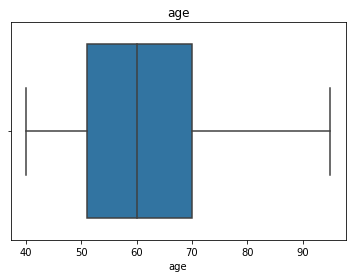

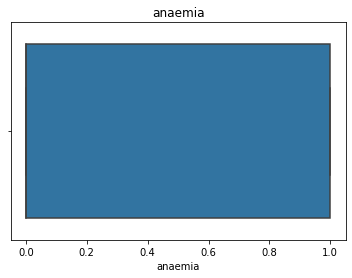

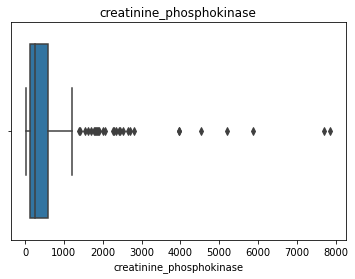

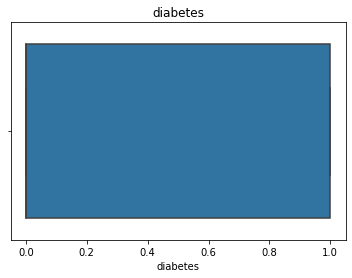

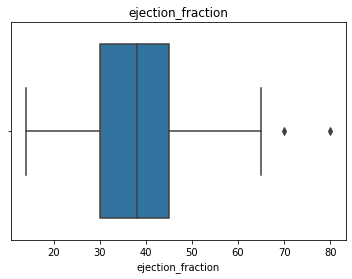

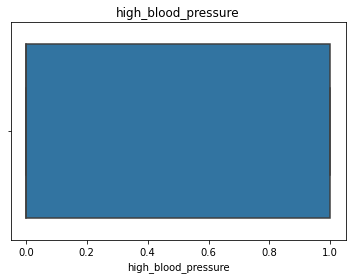

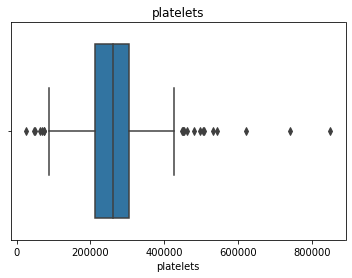

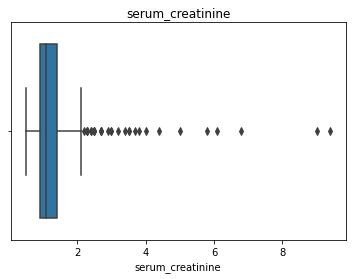

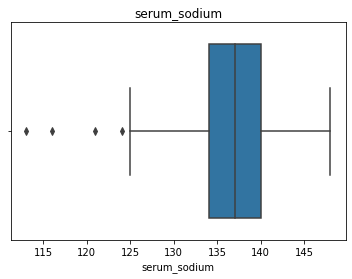

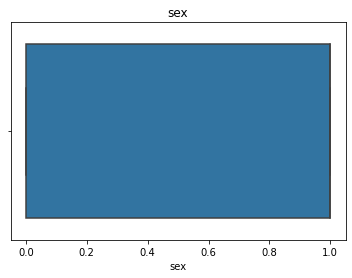

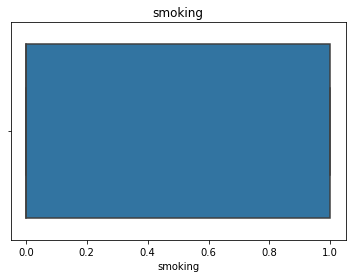

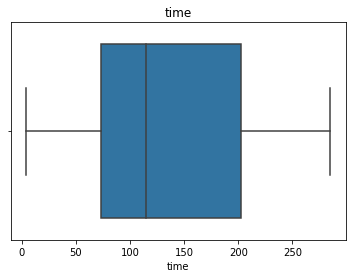

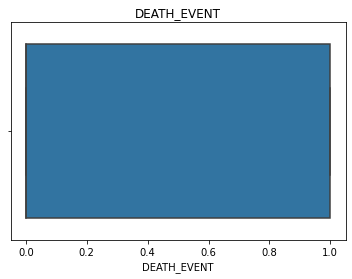

In [8]:
#there are no null values present ,so let's check whether any outliers present or not
for i in df.columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

In [10]:
#as we can see here , there are some outliers present in some features so lets make something to replace the outliers with median as we have a small dataset,we can't directly remove them
df.shape   

(299, 13)

In [11]:
df.kurtosis()

age                         -0.184871
anaemia                     -1.935563
creatinine_phosphokinase    25.149046
diabetes                    -1.901254
ejection_fraction            0.041409
high_blood_pressure         -1.618076
platelets                    6.209255
serum_creatinine            25.828239
serum_sodium                 4.119712
sex                         -1.618076
smoking                     -1.416080
time                        -1.212048
DEATH_EVENT                 -1.416080
dtype: float64

The features with some outliers are
1.creatinine_phosphokinase  
2.ejection_fraction            
3.platelets 
4.serum_creatinine            
5.serum_sodium    

In [30]:
scipy.stats.kurtosis(np.log(df["creatinine_phosphokinase"])),scipy.stats.skew(np.log(df["creatinine_phosphokinase"]))

(-0.3465092806933683, 0.4119271294134731)

In [29]:
df.nlargest(10,"platelets")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
109,45.0,0,292,1,35,0,850000.0,1.30,142,1,1,88,0
296,45.0,0,2060,1,60,0,742000.0,0.80,138,0,0,278,0
105,72.0,1,328,0,30,1,621000.0,1.70,138,0,1,88,1
287,45.0,0,582,1,55,0,543000.0,1.00,132,0,0,250,0
240,70.0,0,81,1,35,1,533000.0,1.30,139,0,0,212,0
117,85.0,1,102,0,60,0,507000.0,3.20,138,0,0,94,0
224,58.0,0,582,1,25,0,504000.0,1.00,138,1,0,205,0
69,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67,1
212,78.0,0,224,0,50,0,481000.0,1.40,138,1,1,192,0
55,95.0,1,371,0,30,0,461000.0,2.00,132,1,0,50,1


In [62]:
df.creatinine_phosphokinase=np.log(df.creatinine_phosphokinase)

In [63]:
df.ejection_fraction=np.log(df.ejection_fraction)

In [64]:
df.platelets=np.log(df.platelets)

In [65]:
df.serum_creatinine=np.log(df.serum_creatinine)
df.serum_sodium=np.log(df.serum_sodium)

In [66]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,5.659896,0.418060,3.590838,0.351171,12.410272,0.198587,4.916709,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,1.134439,0.494067,0.318065,0.478136,0.401100,0.453108,0.032950,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,3.135494,0.000000,2.639057,0.000000,10.130623,-0.693147,4.727388,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,4.757808,0.000000,3.401197,0.000000,12.266694,-0.105361,4.897840,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,5.521461,0.000000,3.637586,0.000000,12.476100,0.095310,4.919981,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,6.366470,1.000000,3.806662,1.000000,12.623136,0.336472,4.941642,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,8.969669,1.000000,4.382027,1.000000,13.652992,2.240710,4.997212,1.000000,1.00000,285.000000,1.00000


In [46]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.366470,0,2.995732,1,12.487485,0.641854,4.867534,1,0,4,1
1,55.0,0,8.969669,0,3.637586,0,12.481270,0.095310,4.912655,1,0,6,1
2,65.0,0,4.983607,0,2.995732,0,11.995352,0.262364,4.859812,1,1,7,1
3,50.0,1,4.709530,0,2.995732,0,12.254863,0.641854,4.919981,1,0,7,1
4,65.0,1,5.075174,1,2.995732,0,12.697715,0.993252,4.753590,0,0,8,1


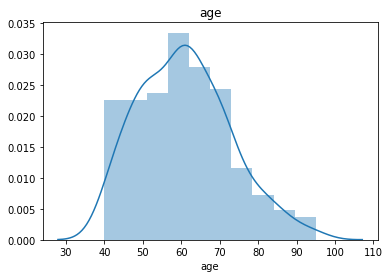

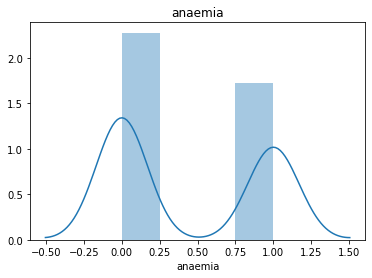

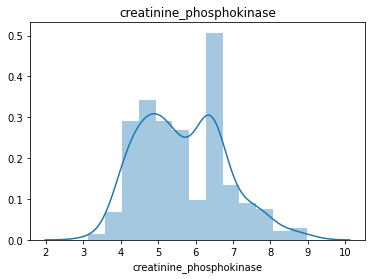

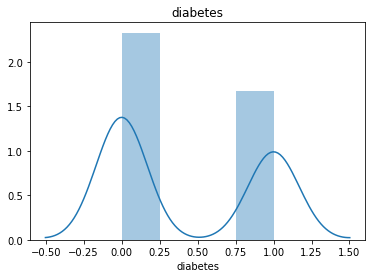

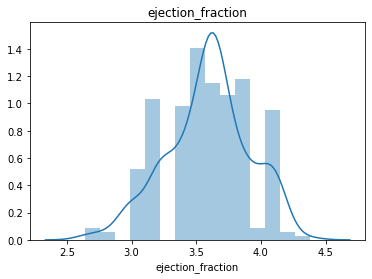

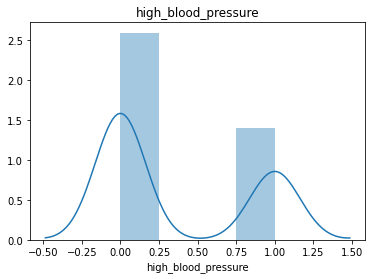

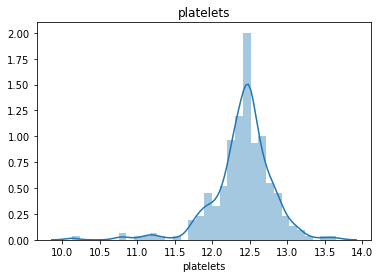

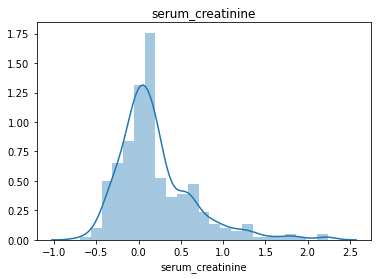

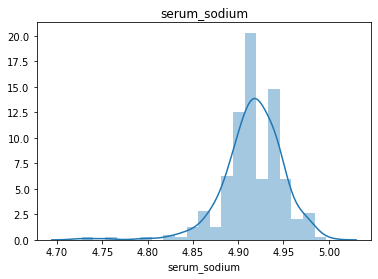

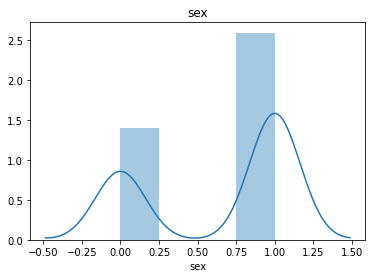

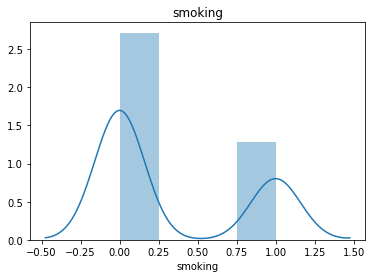

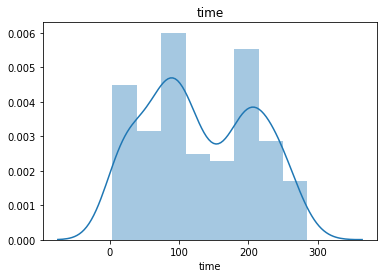

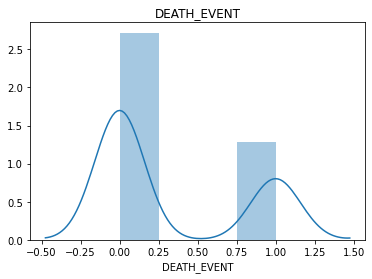

In [48]:
for i in df.columns:
  plt.title(i)
  sns.distplot(df[i])
  plt.show()

In [49]:
# we can see these are in normal dist
# so lets remove outliers
df.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.366470,0,2.995732,1,12.487485,0.641854,4.867534,1,0,4,1
1,55.0,0,8.969669,0,3.637586,0,12.481270,0.095310,4.912655,1,0,6,1
2,65.0,0,4.983607,0,2.995732,0,11.995352,0.262364,4.859812,1,1,7,1
3,50.0,1,4.709530,0,2.995732,0,12.254863,0.641854,4.919981,1,0,7,1
4,65.0,1,5.075174,1,2.995732,0,12.697715,0.993252,4.753590,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,4.110874,1,3.637586,1,11.951180,0.095310,4.962845,1,1,270,0
295,55.0,0,7.506592,0,3.637586,0,12.506177,0.182322,4.934474,0,0,271,0
296,45.0,0,7.630461,1,4.094345,0,13.517105,-0.223144,4.927254,0,0,278,0
297,45.0,0,7.788626,0,3.637586,0,11.849398,0.336472,4.941642,1,1,280,0


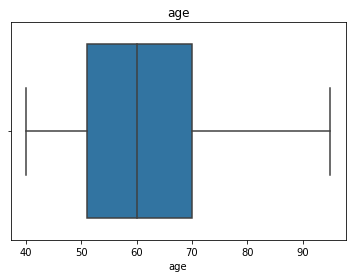

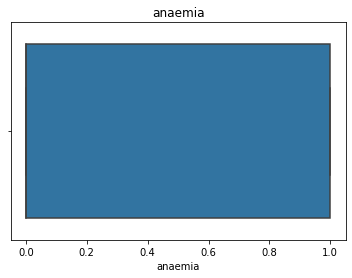

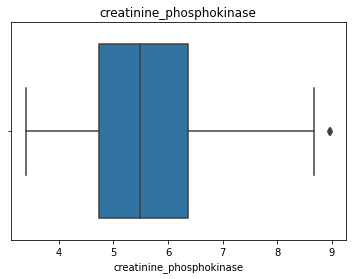

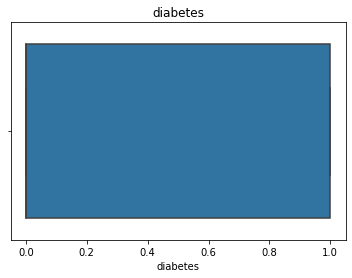

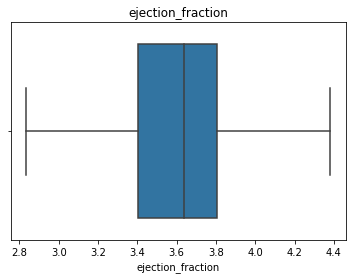

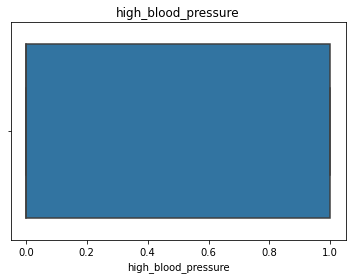

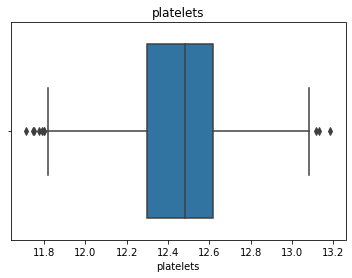

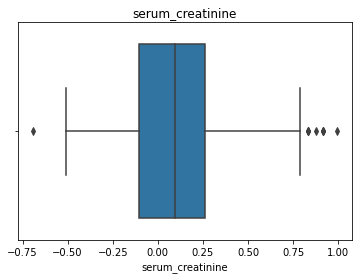

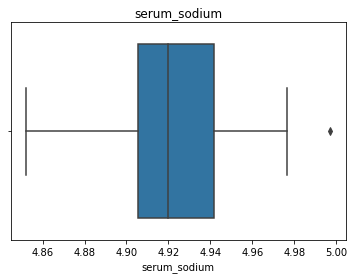

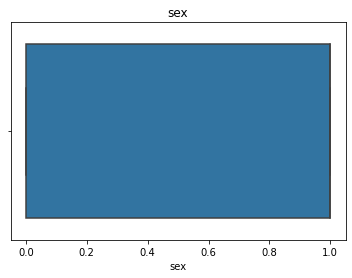

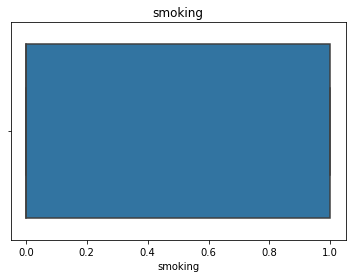

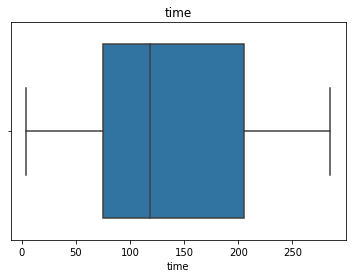

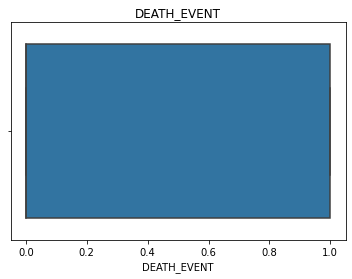

In [69]:
for i in df.columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

In [76]:
df=df[(df.platelets>11.8) & (df.platelets<=13.1) &(df.serum_sodium>=4.878)&(df.serum_creatinine<=0.6)&(df.serum_creatinine>=-0.50)& (df.ejection_fraction>=2.8)]

In [77]:
df.shape

(210, 13)

In [79]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

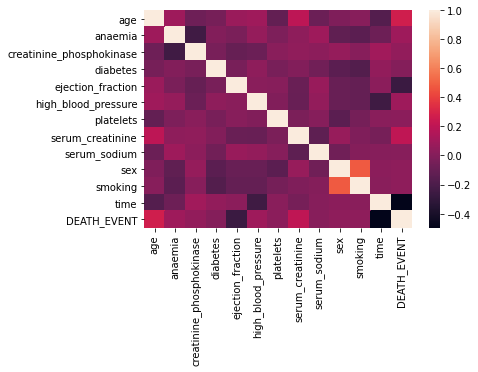

In [81]:
#lets find the relations between features
sns.heatmap(df.corr())


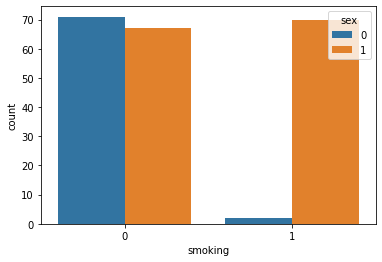

In [88]:
sns.countplot(df.smoking,hue=df.sex)

In [89]:
#lets design a model for making predictions
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("DEATH_EVENT",axis=1),df.DEATH_EVENT,test_size=0.2)

In [120]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [112]:
def builtfun(estimator,X=X_train,y=y_train,xt=X_test,yt=y_test):
  print("****************")
  model=estimator()
  model.fit(X,y)
  p=model.predict(xt)
  print(model.score(xt,yt))
  print(confusion_matrix(p,yt))
  print("****************")



In [119]:
print(builtfun(BernoulliNB))
print(builtfun(RandomForestClassifier))
print(builtfun(SVC))
print(builtfun(LogisticRegression))
print(builtfun(KNeighborsClassifier))


****************
0.7142857142857143
[[30 12]
 [ 0  0]]
****************
None
****************
0.7857142857142857
[[29  8]
 [ 1  4]]
****************
None
****************
0.8095238095238095
[[29  7]
 [ 1  5]]
****************
None
****************
0.7619047619047619
[[28  8]
 [ 2  4]]
****************
None
****************
0.8095238095238095
[[29  7]
 [ 1  5]]
****************
None


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [136]:
#here KNN is performing well lets make a model
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.794, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.794, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.794, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.794, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.853, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.824, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.824, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.879, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.879, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.912, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [138]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [141]:
model=grid.best_estimator_

In [143]:
model.predict(X_test)
model.score(X_test,y_test)

0.8095238095238095

In [148]:
cross_val_score(SVC(C=1),X_train,y_train)

array([0.88235294, 0.88235294, 0.88235294, 0.87878788, 0.87878788])